# House Sales in King County, USA

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

id : A notation for a house

date: Date house was sold

price: Price is prediction target

bedrooms: Number of bedrooms

bathrooms: Number of bathrooms

sqft_living: Square footage of the home

sqft_lot: Square footage of the lot

floors :Total floors (levels) in house

waterfront :House which has a view to a waterfront

view: Has been viewed

condition :How good the condition is overall

grade: overall grade given to the housing unit, based on King County grading system

sqft_above : Square footage of house apart from basement

sqft_basement: Square footage of the basement

yr_built : Built Year

yr_renovated : Year when house was renovated

zipcode: Zip code

lat: Latitude coordinate

long: Longitude coordinate

sqft_living15 : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

sqft_lot15 : LotSize area in 2015(implies-- some renovations)

In [1]:
import pandas as pd
pd.options.display.max_columns = None
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df_house = pd.read_csv(file_name)

I've create some class to help understanding basic information faster

In [3]:
class BasicInfo:
    ''' Just insert dataframe and show all basic information, for running execute 
    BasicInfo(your df).all_call()'''
    
    def __init__(self, df):
        self.df = df
    def heads(self):
        display(self.df.head())
    def shape(self):
        print('Shape of Dataframe :')
        print(self.df.shape)
        print()
    def cols(self):
        print('Columns of Dataframe :')
        print(self.df.columns)
        print()
    def typess(self):
        print('Types information of Data Frame :')
        display(self.df.dtypes.to_frame())
        print()
    def describe(self):
        print('Descriptive Statistic of Dataframe :')
        display(self.df.describe(include='all'))
        print()
    def correlation(self):
        print('Correlation :')
        display(self.df.corr())
        print()
    def isna(self):
        print('Null information :')
        display(self.df.isnull().sum().to_frame())
        print()
    def plot_isna(self):
        print('Plotting Null :')
        #display(sns.heatmap(self.df.isnull(), cbar=False))
        display(msno.matrix(self.df))
        print()
    def all_call(self):
        self.heads()
        self.shape()
        self.cols()
        self.typess()
        self.describe()
        self.correlation()
        self.isna()
        self.plot_isna()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Shape of Dataframe :
(21613, 22)

Columns of Dataframe :
Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Types information of Data Frame :


,0
Unnamed: 0,int64
id,int64
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64



Descriptive Statistic of Dataframe :


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,21613,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10806.00000,4.580302e+09,NaN,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,NaN,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,NaN,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000



Correlation :


,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
Unnamed: 0,1.000000,0.006718,0.027372,0.010308,0.107013,0.044717,-0.026877,0.179138,-0.007611,-0.013751,-0.095419,0.082050,0.071958,-0.041841,0.199549,-0.025601,-0.002199,0.000701,0.008649,0.026647,-0.029827
id,0.006718,1.000000,-0.016762,0.001332,0.005234,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,0.027372,-0.016762,1.000000,0.308890,0.525885,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.010308,0.001332,0.308890,1.000000,0.514508,0.578405,0.032325,0.178178,-0.006800,0.080079,0.026704,0.357145,0.479593,0.302896,0.155792,0.018456,-0.153764,-0.009739,0.131066,0.393560,0.030473
bathrooms,0.107013,0.005234,0.525885,0.514508,1.000000,0.755789,0.087932,0.502462,0.063744,0.188390,-0.126263,0.665887,0.686735,0.283456,0.507013,0.050561,-0.204852,0.024253,0.225103,0.569787,0.087544
sqft_living,0.044717,-0.012258,0.702035,0.578405,0.755789,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.026877,-0.132109,0.089661,0.032325,0.087932,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.179138,0.018525,0.256794,0.178178,0.502462,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.007611,-0.002721,0.266369,-0.006800,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,-0.013751,0.011592,0.397293,0.080079,0.188390,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575



Null information :


,0
Unnamed: 0,0
id,0
date,0
price,0
bedrooms,13
bathrooms,10
sqft_living,0
sqft_lot,0
floors,0
waterfront,0



Plotting Null :


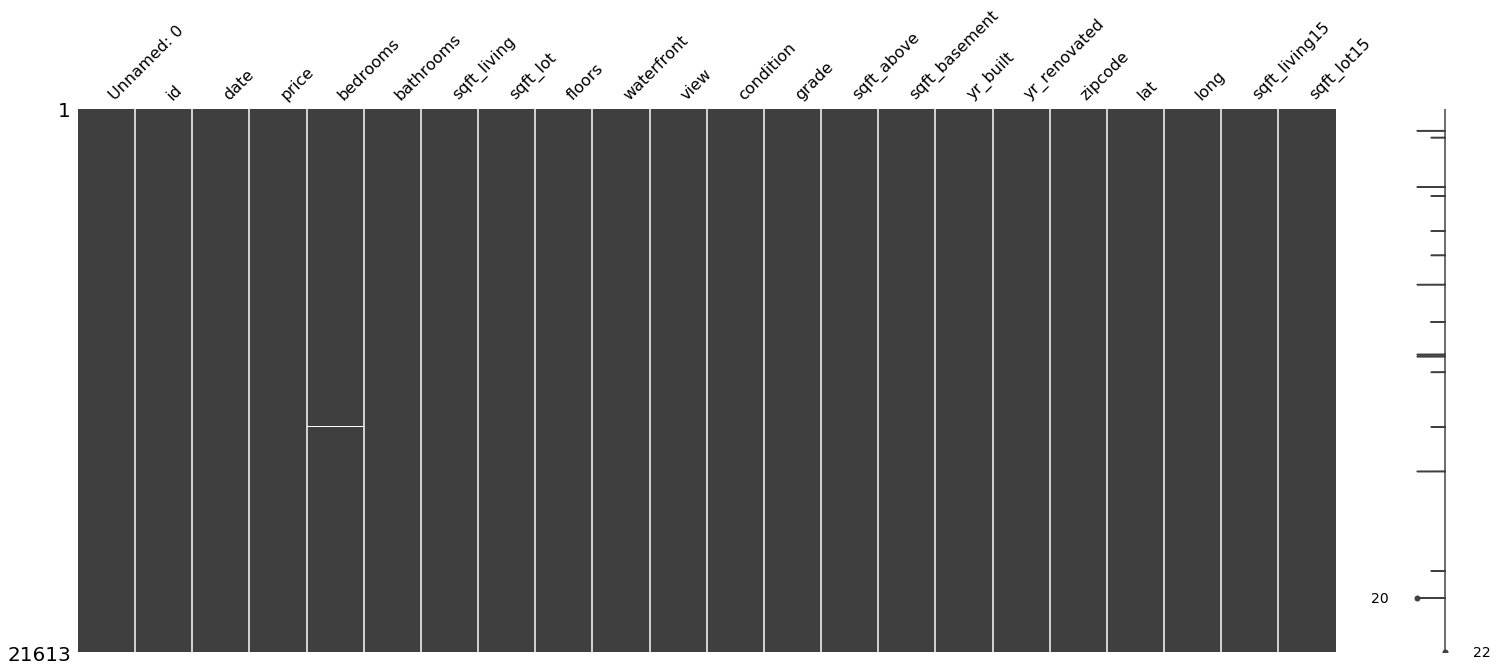

In [4]:
info = BasicInfo(df_house).all_call()
info

Now we know there is unused columun like Unamed 0 and wrong type of data like date is object type, there some missing values which very little, and also very small correlation which we execute later.

In [5]:
#Percentage null
((df_house.isna().sum() / len(df_house))*100).to_frame(name='Column')

,Column
Unnamed: 0,0.000000
id,0.000000
date,0.000000
price,0.000000
bedrooms,0.060149
bathrooms,0.046268
sqft_living,0.000000
sqft_lot,0.000000
floors,0.000000
waterfront,0.000000


In [6]:
#Drop null values
df_house_fix = df_house.dropna()

In [7]:
#Check null again
df_house_fix.isna().sum().to_frame('Total Null')

,Total Null
Unnamed: 0,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0


In [8]:
unik = [len(df_house_fix[u].unique()) for u in df_house_fix.columns.values]
unik

[21597,
 21420,
 372,
 4024,
 12,
 29,
 1034,
 9776,
 6,
 2,
 5,
 5,
 11,
 942,
 306,
 116,
 70,
 70,
 5033,
 751,
 777,
 8682]

In [9]:
#Try to find total unique value for turn it into categorical data type
pd.DataFrame({'Columns':df_house_fix.columns.values, 'Total Unique' :unik})

,Columns,Total Unique
0,Unnamed: 0,21597
1,id,21420
2,date,372
3,price,4024
4,bedrooms,12
5,bathrooms,29
6,sqft_living,1034
7,sqft_lot,9776
8,floors,6
9,waterfront,2


from data we know that some of columns can be convert into categorical from int type likes bedrooms. bathrooms, floors, waterfront, view, condition, grade and zipcode.

In [10]:
#preventing loss/error we copy df
backup_df_house = df_house_fix[:]
backup_df_house

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [11]:
#Change date time from object into date time
df_house_fix['date'] = pd.to_datetime(df_house_fix['date'])

C:\Users\Jey\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
df_house_fix.drop(columns = 'Unnamed: 0', inplace=True)

C:\Users\Jey\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
df_house_fix.to_csv('df_house.csv')

In [14]:
#Since we want to predict price we find correleation of price with all features / columns
df_house_fix.corr()['price'].to_frame().sort_values(by=['price'], ascending=False)

,price
price,1.000000
sqft_living,0.701909
grade,0.667922
sqft_above,0.605371
sqft_living15,0.585247
bathrooms,0.525905
view,0.397318
sqft_basement,0.323776
bedrooms,0.308794
lat,0.306777


In [15]:
df_house_fix.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype=object)

In [16]:
df_house_fix['year'] = pd.DatetimeIndex(df_house_fix['date']).year
df_house_fix

C:\Users\Jey\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014
21609,6600060120,2015-02-23,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015
21610,1523300141,2014-06-23,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014
21611,291310100,2015-01-16,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015


In [17]:
X = df_house_fix.drop(columns=['id', 'date', 'lat', 'long', 'sqft_lot15', 'sqft_living15'])

In [18]:
#let assume that house never rennovated replace with year built
X['renovated'] = X.yr_renovated.replace(0, X.yr_built)

In [19]:
#If we had a house renovated in 2014 and sold in 2015 it will answer -1, and if never renov it become age of house
X.renovated = X.renovated-X.year

In [20]:
#Drop unnecessary
X.drop(columns=['year', 'yr_built', 'yr_renovated'], inplace=True)

In [21]:
X

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,renovated
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,-59
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,-23
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,98028,-82
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,-49
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,98103,-5
21609,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,98146,-1
21610,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,98144,-5
21611,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,98027,-11


In [22]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price            323000.00
bedrooms              1.00
bathrooms             0.75
sqft_living        1120.00
sqft_lot           5645.00
floors                1.00
waterfront            0.00
view                  0.00
condition             1.00
grade                 1.00
sqft_above         1020.00
sqft_basement       560.00
zipcode              85.00
renovated            45.00
dtype: float64


In [23]:
#this is what left :(
dataset_cleared_iqr = X[~((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset_cleared_iqr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,renovated
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,-59
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,-23
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,98028,-82
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,-49
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,98103,-5
21609,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,98146,-1
21610,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,98144,-5
21611,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,98027,-11


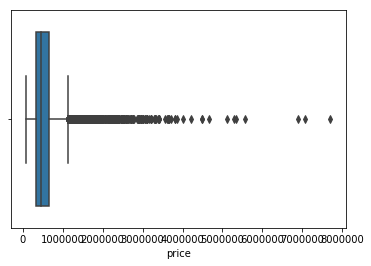

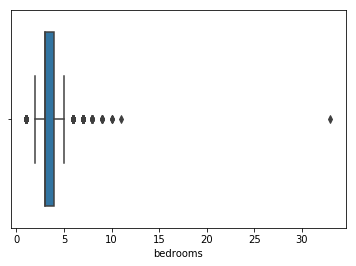

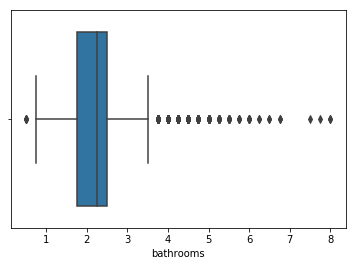

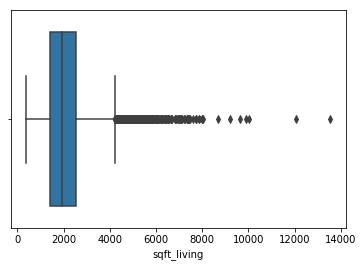

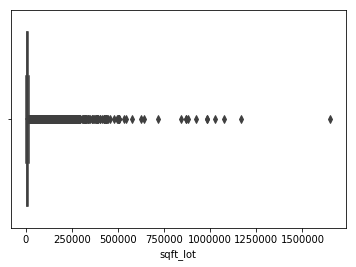

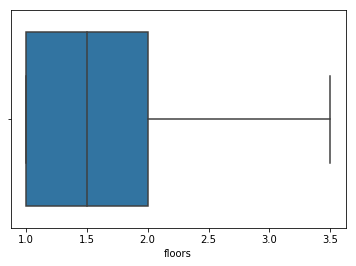

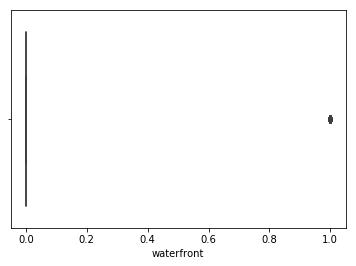

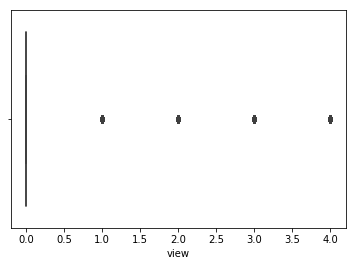

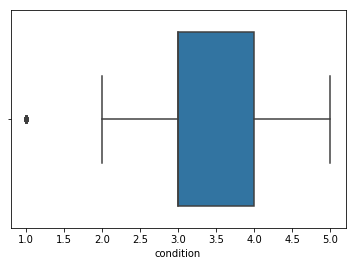

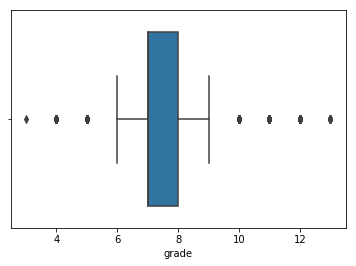

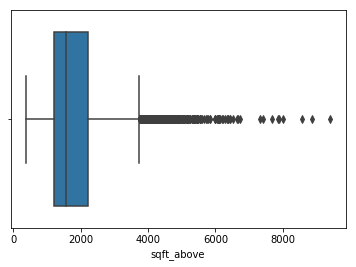

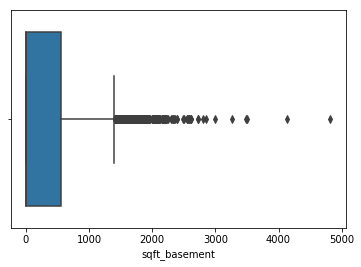

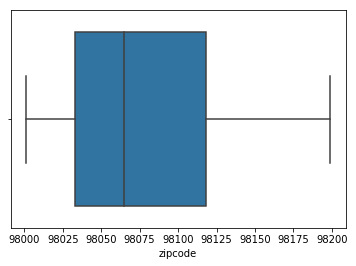

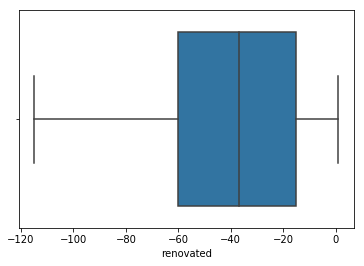

In [24]:
#Before IQR
for j in X.columns.to_list():
    sns.boxplot(X[j])
    plt.show()

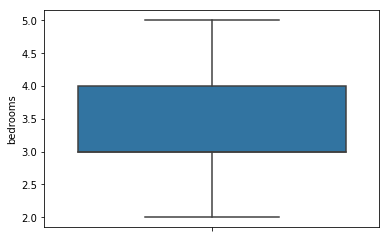

In [25]:
#Before IQR
sns.boxplot(y='bedrooms', data=dataset_cleared_iqr)

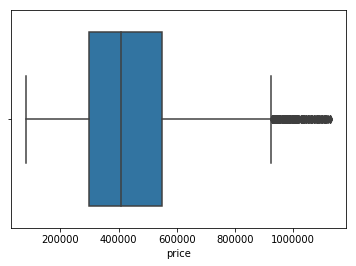

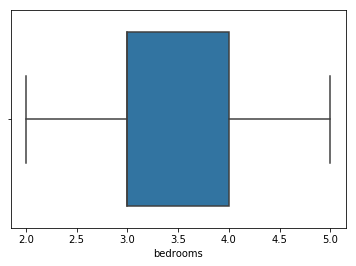

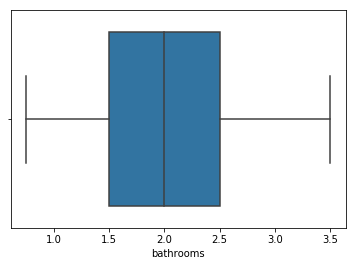

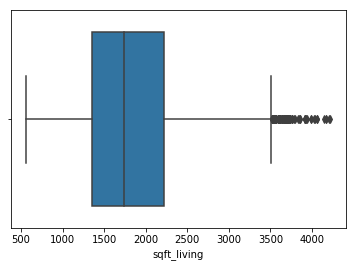

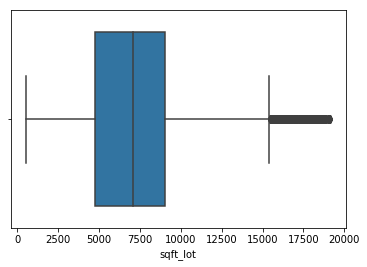

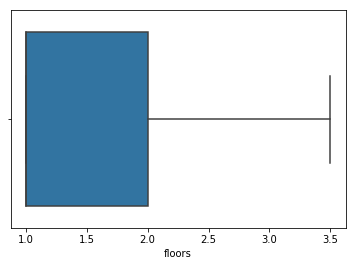

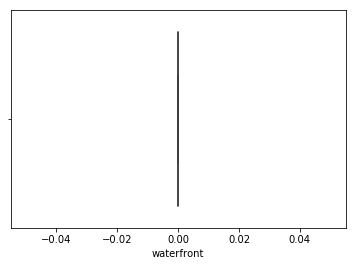

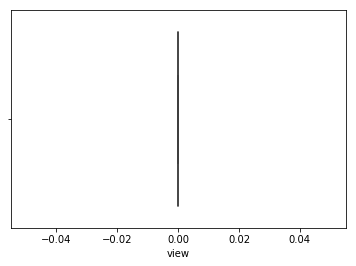

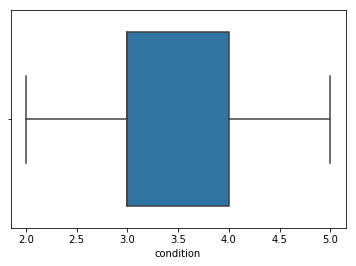

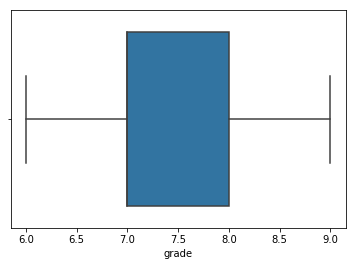

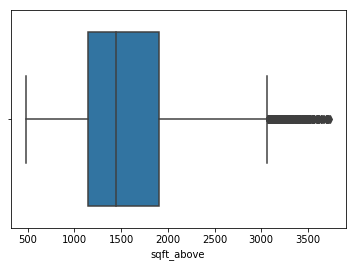

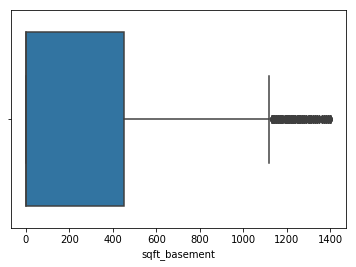

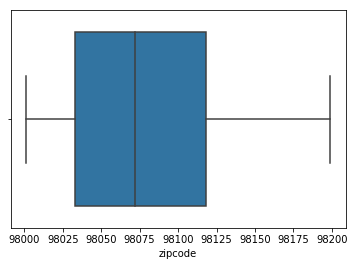

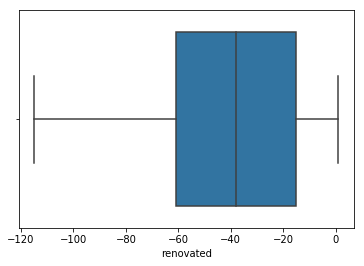

In [26]:
#After Cleared
for j in dataset_cleared_iqr.columns.to_list():
    sns.boxplot(dataset_cleared_iqr[j])
    plt.show()

In [27]:
#Let's try clean outlier using z score because naughty outliers!
df_zscore = dataset_cleared_iqr[:]
df_zscore

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,renovated
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,-59
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,-23
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,98028,-82
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,-49
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,98103,-5
21609,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,98146,-1
21610,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,98144,-5
21611,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,98027,-11


In [28]:
#theres problem with waterfront and view
z = (df_zscore - df_zscore.mean()) / df_zscore.std()
z

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,renovated
0,-1.198387,-0.341613,-1.505172,-1.032159,-0.417494,-0.860633,NaN,NaN,-0.641452,-0.469998,-0.677022,-0.648363,1.836888,-0.593523
1,0.529632,-0.341613,0.426857,1.213949,0.043680,0.974701,NaN,NaN,-0.641452,-0.469998,0.965384,0.476007,0.844741,0.641212
2,-1.427441,-1.636389,-1.505172,-1.694680,0.842623,-0.860633,NaN,NaN,-0.641452,-1.709894,-1.357210,-0.648363,-0.971076,-1.382381
3,0.890434,0.953163,1.586074,0.228247,-0.605787,-0.860633,NaN,NaN,2.466085,-0.469998,-0.892691,1.909578,1.050658,-0.250541
4,0.376565,-0.341613,0.040451,-0.224206,0.286433,-0.860633,NaN,NaN,-0.641452,0.769897,0.152476,-0.648363,-0.109967,0.469721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.443438,-0.341613,0.813262,-0.466592,-1.726567,2.810034,NaN,NaN,-0.641452,0.769897,-0.096374,-0.648363,0.432906,1.258579
21609,-0.224770,0.953163,0.813262,0.793814,-0.370276,0.974701,NaN,NaN,-0.641452,0.769897,1.197643,-0.648363,1.237856,1.395771
21610,-0.213285,-1.636389,-1.891578,-1.290703,-1.663127,0.974701,NaN,NaN,-0.641452,-0.469998,-0.942461,-0.648363,1.200416,1.258579
21611,-0.224770,-0.341613,0.813262,-0.353479,-1.362437,0.974701,NaN,NaN,-0.641452,0.769897,0.019756,-0.648363,-0.989795,1.052790


In [29]:
#Because they are boolean, they become NaN so replace with deafult value
z.waterfront = df_zscore.waterfront
z.view = df_zscore.view
z

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,renovated
0,-1.198387,-0.341613,-1.505172,-1.032159,-0.417494,-0.860633,0,0,-0.641452,-0.469998,-0.677022,-0.648363,1.836888,-0.593523
1,0.529632,-0.341613,0.426857,1.213949,0.043680,0.974701,0,0,-0.641452,-0.469998,0.965384,0.476007,0.844741,0.641212
2,-1.427441,-1.636389,-1.505172,-1.694680,0.842623,-0.860633,0,0,-0.641452,-1.709894,-1.357210,-0.648363,-0.971076,-1.382381
3,0.890434,0.953163,1.586074,0.228247,-0.605787,-0.860633,0,0,2.466085,-0.469998,-0.892691,1.909578,1.050658,-0.250541
4,0.376565,-0.341613,0.040451,-0.224206,0.286433,-0.860633,0,0,-0.641452,0.769897,0.152476,-0.648363,-0.109967,0.469721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.443438,-0.341613,0.813262,-0.466592,-1.726567,2.810034,0,0,-0.641452,0.769897,-0.096374,-0.648363,0.432906,1.258579
21609,-0.224770,0.953163,0.813262,0.793814,-0.370276,0.974701,0,0,-0.641452,0.769897,1.197643,-0.648363,1.237856,1.395771
21610,-0.213285,-1.636389,-1.891578,-1.290703,-1.663127,0.974701,0,0,-0.641452,-0.469998,-0.942461,-0.648363,1.200416,1.258579
21611,-0.224770,-0.341613,0.813262,-0.353479,-1.362437,0.974701,0,0,-0.641452,0.769897,0.019756,-0.648363,-0.989795,1.052790


In [30]:
#Outliers with z score >3
df_zscore[z > 3].count()

price            127
bedrooms           0
bathrooms          0
sqft_living       51
sqft_lot         148
floors             5
waterfront         0
view               0
condition          0
grade              0
sqft_above       104
sqft_basement     98
zipcode            0
renovated          0
dtype: int64

In [31]:
#Outliers with z score < -3
df_zscore[z < - 3].count()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
zipcode          0
renovated        0
dtype: int64

In [32]:
#Final data shrinking 700 rows :(
df_zscore = df_zscore[~(z > 3)].dropna()
df_zscore.shape

(15248, 14)

In [33]:
#zipcode is mean some location a little xpensive or cheap, so one hot encoding the zip code
zipcod = pd.get_dummies(df_zscore.zipcode)

In [34]:
#Merge the zipcoe with df z score
df_merge = pd.concat([df_zscore, zipcod], axis=1)
df_merge

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,renovated,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7,1180.0,0.0,98178,-59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7,2170.0,400.0,98125,-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,6,770.0,0.0,98028,-82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7,1050.0,910.0,98136,-49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8,1680.0,0.0,98074,-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,3,8,1530.0,0.0,98103,-5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21609,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,3,8,2310.0,0.0,98146,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21610,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,3,7,1020.0,0.0,98144,-5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21611,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,3,8,1600.0,0.0,98027,-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
#its time to preprocessing with standard scaler sklearn.preprocessing import StandardScaler minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.
y = df_merge.price
X = df_merge.drop(columns='price')

In [77]:
#Importing modules
#Prepocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

#Algorithm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
#Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#Pipeline and Cross Validation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#Model Evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

#import time
from datetime import datetime

In [37]:
train_test_size = np.array([0.4, 0.3, 0.25, 0.2])

In [54]:
#with this, data can be used with same data to all algorithm without generating more than once
def train_test_function(X,y, test_size, random_state=42):
    return train_test_split(X,y, test_size=test_size, random_state=random_state)

In [64]:
#return rules [0] = X_train, [1] = X_test, [2] = y_train, [3] = y_test
data60 = train_test_function(X,y, 0.4)
data70 = train_test_function(X,y, 0.3)
data75 = train_test_function(X,y, 0.25)
data80 = train_test_function(X,y, 0.2)

In [72]:
def hyper_dt():
    pipe = Pipeline(steps=[('scaler', StandardScaler()), ('dt', DecisionTreeRegressor())])
    # Parameter Tuning
    param = {"dt__max_depth": [None, 2, 3, 5, 11, 21, 33, 55], 
             'dt__criterion':['mse'],
            }
    
    model = GridSearchCV(pipe, param_grid=param, cv = 5, n_jobs=-1)
    return model

In [79]:
def fit_data(model, data):
    XTRAIN, XTEST, YTRAIN, YTEST = data
    model.fit(XTRAIN, YTRAIN)
    return model

In [260]:
def predict_data(model, data):
    XTRAIN, XTEST, YTRAIN, YTEST = data
    train_r2 = r2(YTRAIN, (model.predict(XTRAIN)))
    test_r2 = r2(YTEST, (model.predict(XTEST)))
    train_mse = mse(YTRAIN, (model.predict(XTRAIN)))
    test_mse = mse(YTEST, (model.predict(XTEST)))
    return (train_r2, test_r2, train_mse, test_mse)

In [222]:
print('Start : ', datetime.now())
dt_fit = fit_data(hyper_dt(), data75)
print('End   :', datetime.now())

Start :  2021-01-23 00:02:45.401477
End   : 2021-01-23 00:02:47.151393


In [223]:
dt_fit.best_params_

{'dt__criterion': 'mse', 'dt__max_depth': 21}

In [264]:
dt60 = predict_data(dt_fit, data60)
dt70 = predict_data(dt_fit, data70)
dt75 = predict_data(dt_fit, data75)
dt80 = predict_data(dt_fit, data80)

In [101]:
def hyper_linreg():
    #Pipeline
    pipe = Pipeline(steps=[('scaler', StandardScaler()), ('linreg', LinearRegression())])
    # Parameter Tuning
    param = {'linreg__fit_intercept':[True, False], 
             'linreg__normalize':[True, False],
            }
    model = GridSearchCV(pipe, param_grid=param, cv = 5, n_jobs=-1)
    return model

In [219]:
print('Start : ', datetime.now())
linreg_fit = fit_data(hyper_linreg(), data75)
print('End   :', datetime.now())

Start :  2021-01-23 00:02:01.898154
End   : 2021-01-23 00:02:05.249077


In [220]:
linreg_fit.best_params_

{'linreg__fit_intercept': True, 'linreg__normalize': False}

In [221]:
linreg60 = predict_data(linreg_fit, data60)
linreg70 = predict_data(linreg_fit, data70)
linreg75 = predict_data(linreg_fit, data75)
linreg80 = predict_data(linreg_fit, data80)

In [234]:
def hyper_xgb():
    #Pipeline
    pipe = Pipeline(steps=[('scaler', StandardScaler()), ('xgb', XGBRegressor())])
    # Parameter Tuning
    param =  {
            'xgb__learning_rate': [0.1, 0.01],
            'xgb__max_depth': [None, 3, 5, 7, 11],
            'xgb__min_child_weight': [5, 3, 1],
            'xgb__subsample': [0.7, 0.5],
            'xgb__colsample_bytree': [0.7, 0.5],
            'xgb__n_estimators' : [100, 150, 200],
            'xgb__objective': ['reg:squarederror']
            }
    
    model = GridSearchCV(pipe, param_grid=param, cv = 5, n_jobs=-1)
    return model

In [235]:
print('Start : ', datetime.now())
xgb_fit = fit_data(hyper_xgb(), data75)
print('End   :', datetime.now())

Start :  2021-01-23 00:38:58.241373
End   : 2021-01-23 01:40:20.121503


In [236]:
xgb_fit.best_params_

{'xgb__colsample_bytree': 0.5,
 'xgb__learning_rate': 0.1,
 'xgb__max_depth': 7,
 'xgb__min_child_weight': 1,
 'xgb__n_estimators': 200,
 'xgb__objective': 'reg:squarederror',
 'xgb__subsample': 0.7}

In [262]:
xgb60 = predict_data(xgb_fit, data60)
xgb70 = predict_data(xgb_fit, data70)
xgb75 = predict_data(xgb_fit, data75)
xgb80 = predict_data(xgb_fit, data80)

In [229]:
def hyper_rf():
    #Pipeline
    pipe_rf = Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestRegressor())])
    # Parameter Tuning
    param_dist_rf = {"rf__max_depth": [None, 3, 5, 7, 11], 
                     "rf__n_estimators": np.array([100, 150, 200, 500]), 
                     'rf__criterion': ['mse']}
    
    model = GridSearchCV(pipe_rf, param_grid=param_dist_rf, cv = 5, n_jobs=-1)
    return model

In [230]:
print('Start :', datetime.now())
rf_fit = fit_data(hyper_rf(), data75)
print('End   :', datetime.now())

Start : 2021-01-23 00:07:34.590070
End   : 2021-01-23 00:15:37.986935


In [231]:
rf_fit.best_params_

{'rf__criterion': 'mse', 'rf__max_depth': None, 'rf__n_estimators': 500}

In [263]:
rf60 = predict_data(rf_fit, data60)
rf70 = predict_data(rf_fit, data60)
rf75 = predict_data(rf_fit, data60)
rf80 = predict_data(rf_fit, data60)

In [153]:
data80[0].shape

(12198, 83)

In [245]:
#Neural Network
from keras.models import Sequential
from keras.layers import Dense 
from keras.wrappers.scikit_learn import KerasRegressor

#Try with neural Network
# baseline model
def hyper_nn():
    # create model
    model = Sequential()
    model.add(Dense(83, input_dim = 83 , activation='relu'))
    model.add(Dense(83, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
def compile_nn():
    # Compile model
    model = KerasRegressor(build_fn = hyper_nn)
    pipe = Pipeline(steps=[('scaler', StandardScaler()), ('nn', model)])
    params = {'nn__epochs':[10, 50, 100], 'nn__batch_size':[32, 64, 100]}
    grid_search = GridSearchCV(pipe, param_grid=params, cv = 3)
    return grid_search
    

In [246]:
print('Start : ', datetime.now())
nn_fit = fit_data(compile_nn(), data75)
print('End   :', datetime.now())

Start :  2021-01-23 01:54:50.787608
Epoch 1/10
7624/7624 [==============================] - 2s 262us/step - loss: 216260903049.5362
Epoch 2/10
7624/7624 [==============================] - 1s 100us/step - loss: 213072696890.5603
Epoch 3/10
7624/7624 [==============================] - 1s 102us/step - loss: 201433617772.2560
Epoch 4/10
7624/7624 [==============================] - 1s 94us/step - loss: 177865368506.1574
Epoch 5/10
7624/7624 [==============================] - 1s 95us/step - loss: 144038408110.3379
Epoch 6/10
7624/7624 [==============================] - 1s 94us/step - loss: 106503366559.2949
Epoch 7/10
7624/7624 [==============================] - 1s 93us/step - loss: 72682817215.7985
Epoch 8/10
7624/7624 [==============================] - 1s 94us/step - loss: 47235026116.6338
Epoch 9/10
7624/7624 [==============================] - 1s 91us/step - loss: 30311158737.7964
Epoch 10/10
3812/3812 [==============================] - 2s 440us/step
Epoch 1/10
7624/7624 [================

In [248]:
nn_fit.best_params_

{'nn__batch_size': 32, 'nn__epochs': 100}

In [265]:
nn60 = predict_data(nn_fit, data60)
nn70 = predict_data(nn_fit, data70)
nn75 = predict_data(nn_fit, data75)
nn80 = predict_data(nn_fit, data80)

In [326]:
pd.DataFrame([[1,2,3]] )

,0,1,2
0,1,2,3


In [421]:
cols = ['Algorithm', 'Best_Parameters', 'R2_Training_60', 'R2_Training_70',\
                                'R2_Training_75', 'R2_Training_80', 'R2_Testing_60', 'R2_Testing_70',\
                                'R2_Testing_75', 'R2_Testing_80', 'MSE_Training_60', 'MSE_Training_70',\
                                'MSE_Training_75', 'MSE_Training_80','MSE_Testing_60', 'MSE_Testing_70',\
                                'MSE_Testing_75', 'MSE_Testing_80']

In [440]:
cols = ['Algorithm', 'Best_Parameters', 'R2_Training_60', 'R2_Testing_60', 'MSE_Training_60', 'MSE_Testing_60',\
        'R2_Training_70', 'R2_Testing_70', 'MSE_Training_70', 'MSE_Testing_70',\
        'R2_Training_75', 'R2_Testing_75', 'MSE_Training_75', 'MSE_Testing_75', \
        'R2_Training_80', 'R2_Testing_80', 'MSE_Training_80', 'MSE_Testing_80']

In [441]:
def to_df(*res):
    c = []
    for a in res:
        for b in a:
            c.append(b)
    
    return  pd.DataFrame([c], columns=cols)

    

In [448]:
df_lr = to_df(['Linear Regression'], [linreg_fit.best_params_], linreg60, linreg70, linreg75, linreg80)
df_dt = to_df(['Decision Tree'], [dt_fit.best_params_], dt60, dt70, dt75, dt80)
df_rf = to_df(['Random Forest'], [rf_fit.best_params_], rf60, rf70, rf75, rf80)
df_xgb = to_df(['Xtreme Gradient Boost'], [xgb_fit.best_params_], xgb60, xgb70, xgb75, xgb80)
df_nn = to_df(['Neural Network Keras'], [nn_fit.best_params_], nn60, nn70, nn75, nn80)

In [454]:
df_results = pd.concat([df_lr, df_dt, df_rf, df_xgb, df_nn], ignore_index = True)
df_results

,Algorithm,Best_Parameters,R2_Training_60,R2_Testing_60,MSE_Training_60,MSE_Testing_60,R2_Training_70,R2_Testing_70,MSE_Training_70,MSE_Testing_70,R2_Training_75,R2_Testing_75,MSE_Training_75,MSE_Testing_75,R2_Training_80,R2_Testing_80,MSE_Training_80,MSE_Testing_80
0,Linear Regression,"{'linreg__fit_intercept': True, 'linreg__norma...",0.821768,0.816996,5.300038e+09,5.542278e+09,0.820356,0.816996,5.355622e+09,5.493352e+09,0.820426,0.816996,5.323546e+09,5.617147e+09,0.819203,0.816996,5.378241e+09,5.471756e+09
1,Decision Tree,"{'dt__criterion': 'mse', 'dt__max_depth': 21}",0.954271,0.761392,1.359840e+09,7.196362e+09,0.954078,0.697252,1.369046e+09,9.120393e+09,0.953462,0.653306,1.379644e+09,1.064009e+10,0.931606,0.661592,2.034545e+09,1.033451e+10
2,Random Forest,"{'rf__criterion': 'mse', 'rf__max_depth': None...",0.974288,0.869262,7.645995e+08,3.943020e+09,0.974288,0.869262,7.645995e+08,3.943020e+09,0.974288,0.869262,7.645995e+08,3.943020e+09,0.974288,0.869262,7.645995e+08,3.943020e+09
3,Xtreme Gradient Boost,"{'xgb__colsample_bytree': 0.5, 'xgb__learning_...",0.920742,0.870912,2.356866e+09,3.893252e+09,0.920624,0.854503,2.366395e+09,4.383150e+09,0.920285,0.843712,2.363169e+09,4.796497e+09,0.914424,0.846929,2.545658e+09,4.674596e+09
4,Neural Network Keras,"{'nn__batch_size': 32, 'nn__epochs': 100}",0.852328,0.843340,4.391280e+09,4.724823e+09,0.850794,0.843879,4.448207e+09,4.703198e+09,0.851229,0.841390,4.410362e+09,4.867770e+09,0.849768,0.844539,4.468991e+09,4.747571e+09


In [509]:
def plotting(alg, train_result, test_results, train_test_size, xlabel):
    sns.set_style('darkgrid')
    sns.lineplot(1-train_test_size, train_result, label='Training')
    sns.lineplot(1-train_test_size, test_results, label='Testing')
    plt.xlabel('Data Size')
    plt.ylabel(xlabel)
    plt.title(alg)
    plt.legend()
    plt.show()

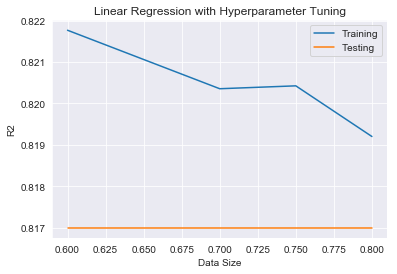

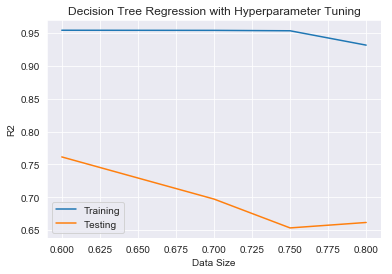

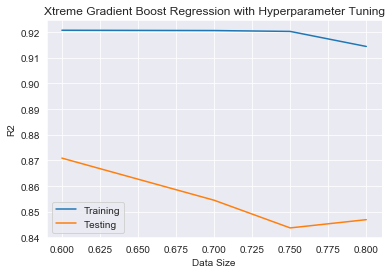

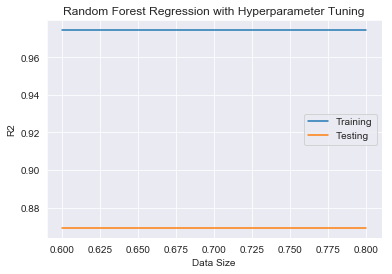

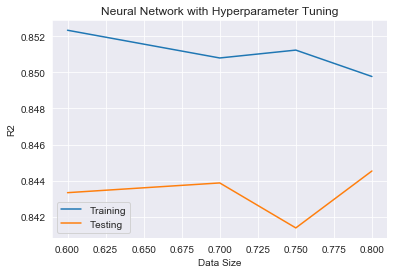

In [518]:
#R^2 Plotting
plotting('Linear Regression with Hyperparameter Tuning', [linreg60[0], linreg70[0], linreg75[0], linreg80[0]], [linreg60[1],\
        linreg70[1], linreg75[1], linreg80[1]], train_test_size, 'R2')
plotting('Decision Tree Regression with Hyperparameter Tuning', [dt60[0], dt70[0], dt75[0], dt80[0]], [dt60[1],\
        dt70[1], dt75[1], dt80[1]], train_test_size, 'R2')
plotting('Xtreme Gradient Boost Regression with Hyperparameter Tuning', [xgb60[0], xgb70[0], xgb75[0], xgb80[0]], [xgb60[1],\
       xgb70[1], xgb75[1], xgb80[1]], train_test_size, 'R2')
plotting('Random Forest Regression with Hyperparameter Tuning', [rf60[0], rf70[0], rf75[0], rf80[0]], [rf60[1],\
        rf70[1], rf75[1], rf80[1]], train_test_size, 'R2')
plotting('Neural Network with Hyperparameter Tuning', [nn60[0], nn70[0], nn75[0], nn80[0]], [nn60[1],\
        nn70[1], nn75[1], nn80[1]], train_test_size, 'R2')

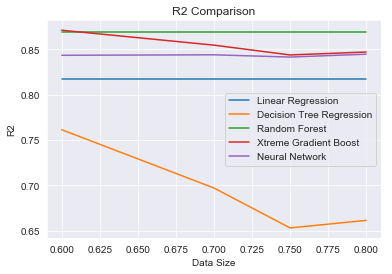

In [523]:
#Joined R2
sns.lineplot(x = 1-train_test_size, y = [linreg60[1], linreg70[1], linreg75[1], linreg80[1]], label = 'Linear Regression')
sns.lineplot(x = 1-train_test_size, y= [dt60[1],dt70[1], dt75[1], dt80[1]], label= 'Decision Tree Regression')
sns.lineplot(x = 1-train_test_size, y=[rf60[1], rf70[1], rf75[1], rf80[1]], label='Random Forest')
sns.lineplot(x = 1-train_test_size, y=[xgb60[1], xgb70[1], xgb75[1], xgb80[1]], label='Xtreme Gradient Boost')
sns.lineplot(x = 1-train_test_size, y=[nn60[1],nn70[1], nn75[1], nn80[1]], label='Neural Network')
plt.legend()
plt.title('R2 Comparison')
plt.xlabel('Data Size')
plt.ylabel('R2')
plt.show()

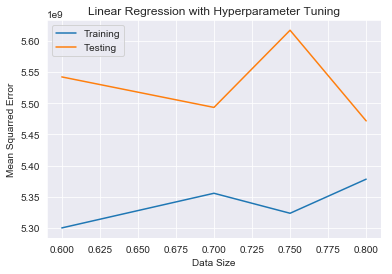

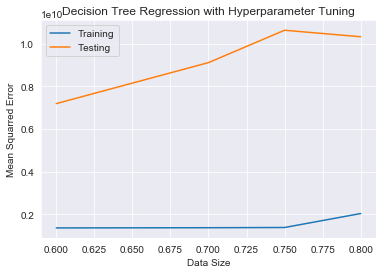

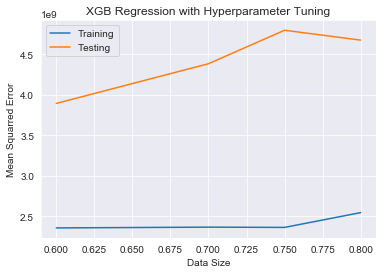

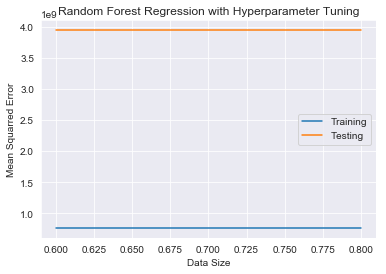

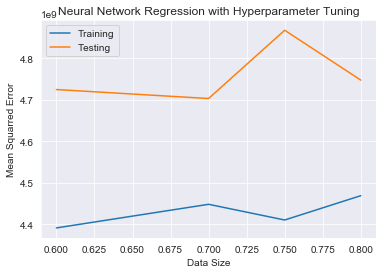

In [269]:
#MSE Plotting
plotting('Linear Regression with Hyperparameter Tuning', [linreg60[2], linreg70[2],linreg75[2], linreg80[2]], [linreg60[3],\
        linreg70[3], linreg75[3], linreg80[3]], train_test_size, 'Mean Squarred Error')
plotting('Decision Tree Regression with Hyperparameter Tuning', [dt60[2], dt70[2], dt75[2], dt80[2]], [dt60[3],\
        dt70[3], dt75[3], dt80[3]], train_test_size, 'Mean Squarred Error')
plotting('XGB Regression with Hyperparameter Tuning', [xgb60[2], xgb70[2], xgb75[2], xgb80[2]], [xgb60[3],\
       xgb70[3], xgb75[3], xgb80[3]], train_test_size, 'Mean Squarred Error')
plotting('Random Forest Regression with Hyperparameter Tuning', [rf60[2], rf70[2], rf75[2], rf80[2]], [rf60[3],\
        rf70[3], rf75[3], rf80[3]], train_test_size, 'Mean Squarred Error')
plotting('Neural Network Regression with Hyperparameter Tuning', [nn60[2], nn70[2], nn75[2], nn80[2]], [nn60[3],\
        nn70[3], nn75[3], nn80[3]], train_test_size, 'Mean Squarred Error')

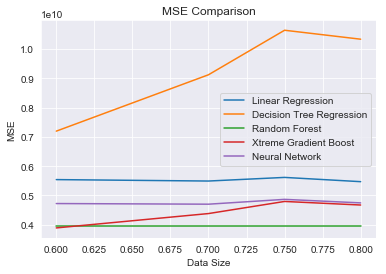

In [524]:
#Joined MSE
sns.lineplot(x = 1-train_test_size, y = [linreg60[3], linreg70[3], linreg75[3], linreg80[3]], label = 'Linear Regression')
sns.lineplot(x = 1-train_test_size, y= [dt60[3],dt70[3], dt75[3], dt80[3]], label= 'Decision Tree Regression')
sns.lineplot(x = 1-train_test_size, y=[rf60[3], rf70[3], rf75[3], rf80[3]], label='Random Forest')
sns.lineplot(x = 1-train_test_size, y=[xgb60[3], xgb70[3], xgb75[3], xgb80[3]], label='Xtreme Gradient Boost')
sns.lineplot(x = 1-train_test_size, y=[nn60[3],nn70[3], nn75[3], nn80[3]], label='Neural Network')
plt.legend()
plt.title('MSE Comparison')
plt.xlabel('Data Size')
plt.ylabel('MSE')
plt.show()

Let's see the result

Text(0.5, 1.0, 'R^2 Comparison of Machine Learning Algorithm')

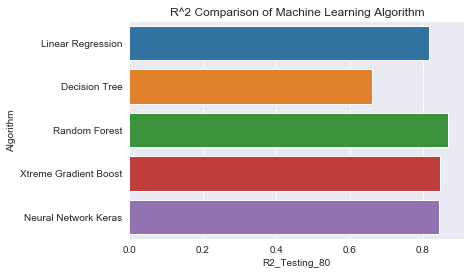

In [458]:
#Comparison of Machine Learning Algorithm R2(Coefficient Determination)
sns.barplot(y='Algorithm', x='R2_Testing_80', data = df_results)
plt.title('R^2 Comparison of Machine Learning Algorithm')
#Higher better

Text(0.5, 1.0, 'MSE Comparison of Machine Learning Algorithm')

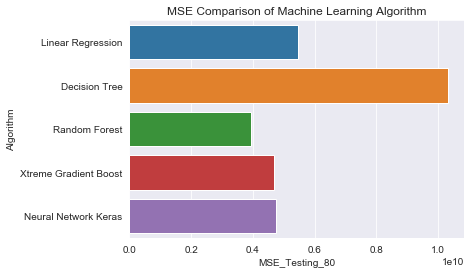

In [459]:
#Comparison of Machine Learning Algorithm Mean Squarred Error
sns.barplot(y='Algorithm', x='MSE_Testing_80', data = df_results)
plt.title('MSE Comparison of Machine Learning Algorithm')
#Lower better

In [505]:
def scatter(fitted_model, names):
    sns.set_style('darkgrid')
    sns.regplot(data80[3], fitted_model.predict(data80[1]))
    plt.xlabel('Test Data')
    plt.ylabel('Prediction Data')
    plt.title('Test Data vs Prediction Data using '+ names)
    plt.show()

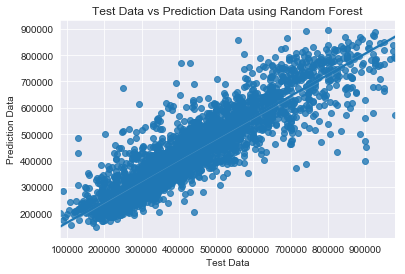

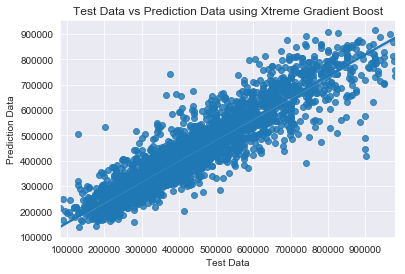

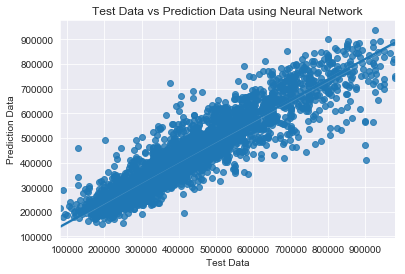

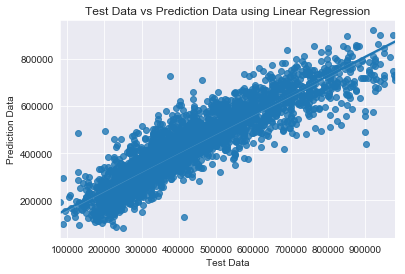

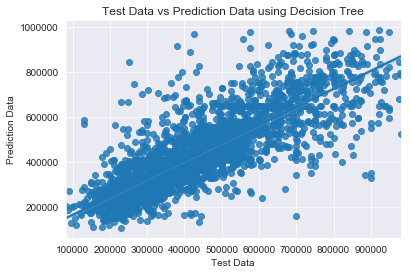

In [513]:
scatter(rf_fit, 'Random Forest')
scatter(xgb_fit, 'Xtreme Gradient Boost')
scatter(nn_fit, 'Neural Network')
scatter(linreg_fit, 'Linear Regression')
scatter(dt_fit, "Decision Tree")